# Introduction to Plotting with pandas, Matplotlib and Seaborn


## 1. Objectives


- Introduction to plotting with matplotlib
- Introduction to plotting with pandas
- Introduction to plotting with seaborn

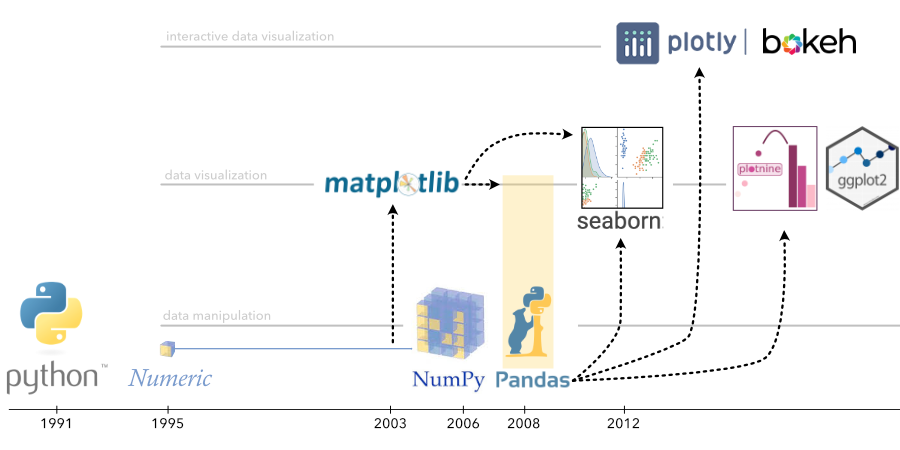

## 2. Warm-up 

### *Q: Warm-up exercise*:

1. Load data into a notebook in a dataframe
2. Inspect data: what columns do we have ? what types ? are there missing values ?
3. Drop all rows with any missing values


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('penguins_clean.csv')  #change path to your local copy of the data

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


In [5]:
# do we have missing values ?


df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [7]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

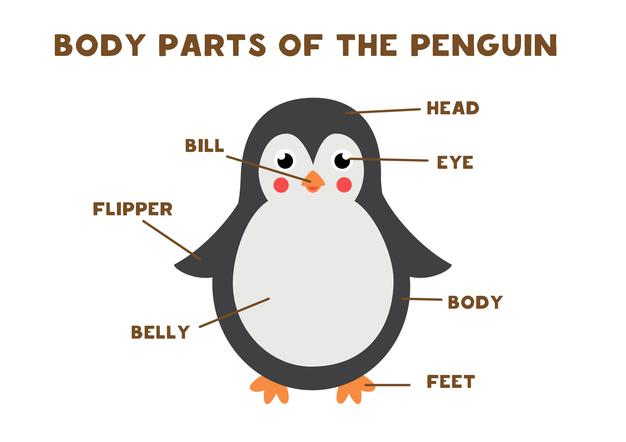

## 3. Plotting with Matplotlib

check out the [matplotlib gallery](https://matplotlib.org/stable/gallery/index.html) for more examples of different kinds of plots with code

### 3.1 Syntax for creating an empty figure

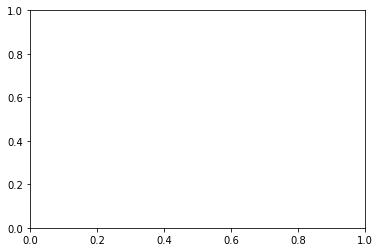

In [8]:
fig, ax = plt.subplots()
plt.show()


### 3.2 Adding data to axes of a figure

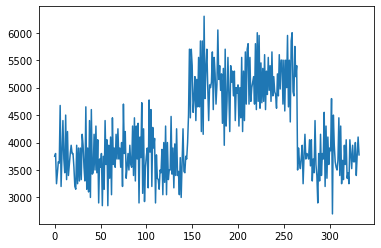

In [9]:
fig, ax = plt.subplots()

ax.plot(df['body_mass_g'])

plt.show()

### *Q1: Do bigger pinguins have longer flippers ?*

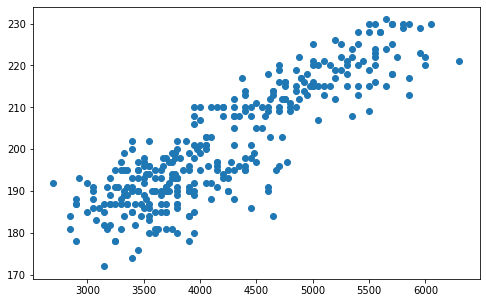

In [10]:
fig, ax = plt.subplots(figsize = (8,5))

ax.scatter(x=df['body_mass_g'], y=df['flipper_length_mm'])

plt.show()

### 3.3 Configuring a plot

### *Q2: Does the trend observed in Q1 hold for both male and female penguins*

In [11]:
df_male = df.loc[df['sex']=='male']
df_female = df.loc[df['sex']=='female']

In [12]:
df_female.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female


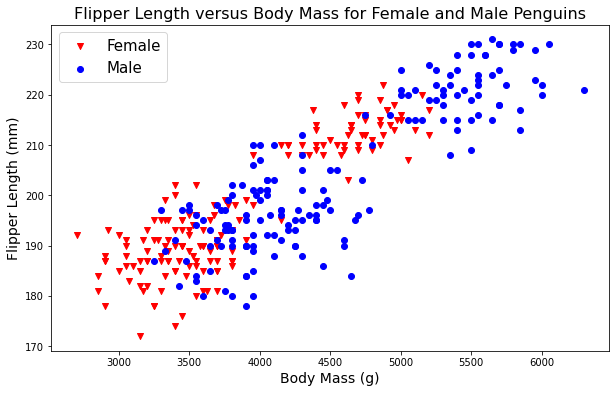

In [13]:
# subset the data based on gender

df_male = df.loc[df['sex']=='male']
df_female = df.loc[df['sex']=='female']


fig, ax = plt.subplots(figsize = (10,6))

ax.scatter(x=df_female['body_mass_g'], y=df_female['flipper_length_mm'], 
           color='red', marker='v', label='Female')

ax.scatter(x=df_male['body_mass_g'], y=df_male['flipper_length_mm'], 
           color='blue', marker='o', label='Male')

ax.set_xlabel('Body Mass (g)', fontsize=14)
ax.set_ylabel('Flipper Length (mm)', fontsize=14)
ax.set_title('Flipper Length versus Body Mass for Female and Male Penguins', fontsize=16)
ax.legend(fontsize=15)
plt.show()

### 3.4 Subplots 

### *Q3: What is the distribution of body mass for both males and females*

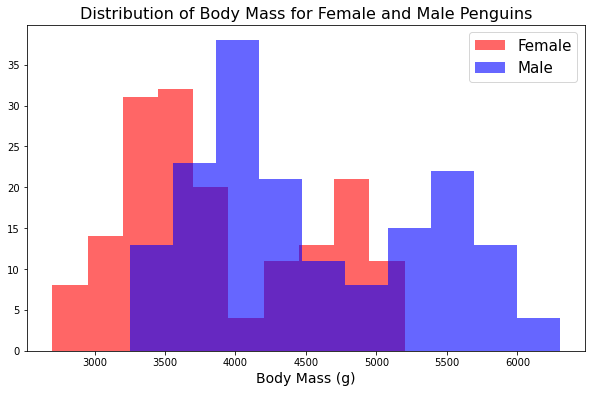

In [14]:
# one way to answer this

fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df_female['body_mass_g'], color='red', label='Female', alpha=0.6)

ax.hist(df_male['body_mass_g'], color='blue', label='Male', alpha=0.6)

ax.set_xlabel('Body Mass (g)', fontsize=14)
ax.set_title('Distribution of Body Mass for Female and Male Penguins', fontsize=16)
ax.legend(fontsize=15)
plt.show()

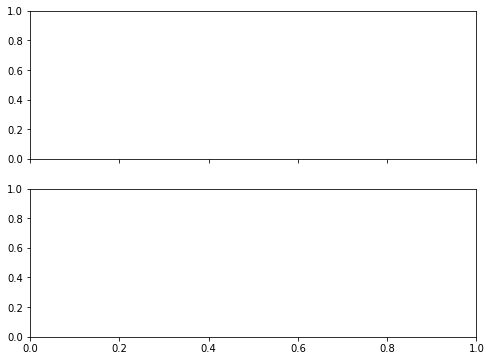

In [15]:
fig, ax = plt.subplots(2,1, figsize=(8,6), sharey=True, sharex=True)

plt.show()

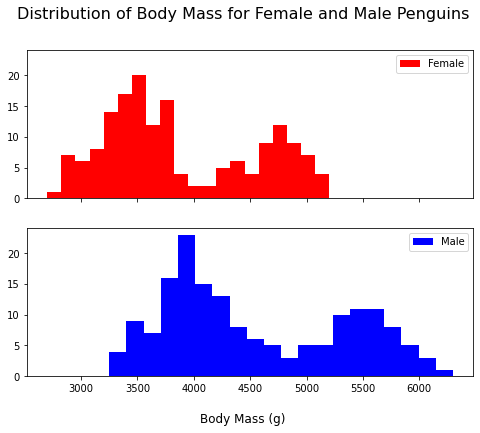

In [16]:
# another way for a better view of the distributions is to use subplots

fig, ax = plt.subplots(2,1, figsize=(8,6), sharex=True, sharey=True)

ax[0].hist(df_female['body_mass_g'], color='red', label='Female', bins=20)
ax[0].legend()

ax[1].hist(df_male['body_mass_g'], color='blue', label='Male', bins=20)
ax[1].legend()

fig.supxlabel('Body Mass (g)')
fig.suptitle('Distribution of Body Mass for Female and Male Penguins', fontsize=16)

plt.show()

## 3.4 More Comparative Plots

### *Q4: Does Penguins living in different islands have different weights ?*

In [17]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [18]:
# slice the data according to island column

df_torgersen = df.loc[df['island']=='Torgersen']
df_biscoe = df.loc[df['island']=='Biscoe']
df_dream = df.loc[df['island']=='Dream']

In [19]:
df_biscoe.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
15,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female
16,Adelie,Biscoe,37.7,18.7,180.0,3600.0,male
17,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female
18,Adelie,Biscoe,38.2,18.1,185.0,3950.0,male
19,Adelie,Biscoe,38.8,17.2,180.0,3800.0,male


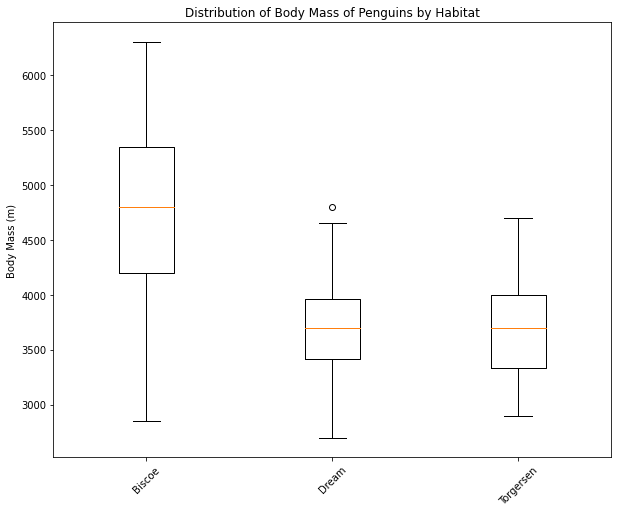

In [20]:
fig, ax = plt.subplots(figsize=(10,8))

ax.boxplot([df_biscoe['body_mass_g'], df_dream['body_mass_g'], df_torgersen['body_mass_g']])
ax.set_xticklabels(['Biscoe', 'Dream', 'Torgersen'])

ax.set_ylabel('Body Mass (m)')
ax.set_title('Distribution of Body Mass of Penguins by Habitat')
plt.xticks(rotation=45)
plt.show()
plt.show()

In [21]:
df_biscoe.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,163.000000,163.000000,163.000000,163.000000
mean,45.248466,15.907362,209.558282,4719.171779
std,4.827319,1.827653,14.282467,790.860069
min,34.500000,13.100000,172.000000,2850.000000
25%,41.850000,14.500000,198.500000,4200.000000
50%,45.800000,15.600000,213.000000,4800.000000
75%,48.750000,17.000000,220.000000,5350.000000
max,59.600000,21.100000,231.000000,6300.000000


In [22]:
df_biscoe.shape
df_biscoe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 15 to 264
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            163 non-null    object 
 1   island             163 non-null    object 
 2   bill_length_mm     163 non-null    float64
 3   bill_depth_mm      163 non-null    float64
 4   flipper_length_mm  163 non-null    float64
 5   body_mass_g        163 non-null    float64
 6   sex                163 non-null    object 
dtypes: float64(4), object(3)
memory usage: 10.2+ KB


### *Q5: What is the relationship between bill length and depth ? Is it the same for all species*

In [23]:
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

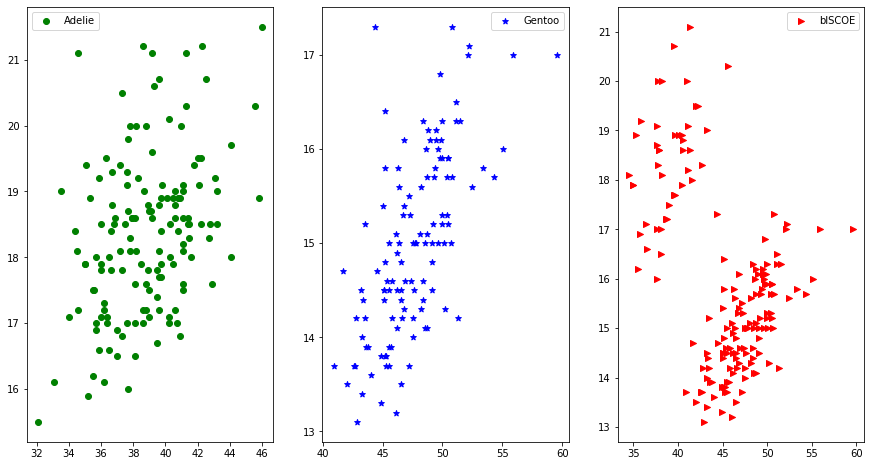

In [24]:
# one way to do this with subplots


# segment data based on species

df_adelie = df.loc[df['species']=='Adelie']
df_gentoo = df.loc[df['species']=='Gentoo']
df_chinstrap = df.loc[df['species']=='Chinstrap']

fig, ax = plt.subplots(1, len(df['species'].unique()), figsize=(15, 8))

ax[0].scatter(df_adelie['bill_length_mm'], df_adelie['bill_depth_mm'], color='green', marker='o', label='Adelie')
ax[0].legend()

ax[1].scatter(df_gentoo['bill_length_mm'], df_gentoo['bill_depth_mm'], color='blue', marker='*', label='Gentoo')
ax[1].legend()


ax[2].scatter(df_biscoe['bill_length_mm'], df_biscoe['bill_depth_mm'], color='red', marker='>', label='bISCOE')
ax[2].legend()

plt.show()

### 3.5 Additional Resources:

1. Gallery: https://matplotlib.org/3.1.0/gallery/index.html  
2. Great youtube series on matplotlib: https://www.youtube.com/playlist?list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_

## 4. Plotting with pandas

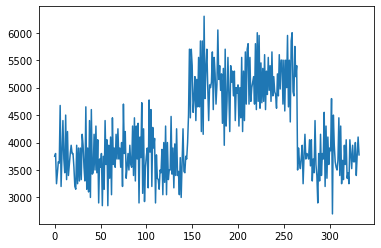

In [25]:
#plot one column
df['body_mass_g'].plot() ;  #default: line-plot.

<AxesSubplot:>

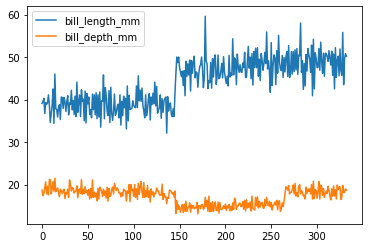

In [26]:
# plot two columns
df[['bill_length_mm', 'bill_depth_mm']].plot()  #automatic legend

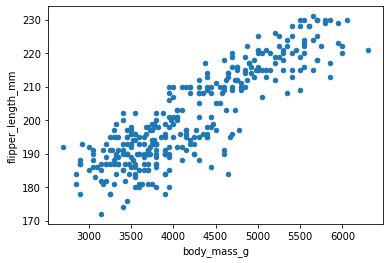

In [27]:
# plot one column against another
df.plot(x='body_mass_g', y= 'flipper_length_mm', kind='scatter') ; # second kind of syntax

### we have multiple options to visualize distributions: histogram, violin, kde (kernel density estimation), boxplot

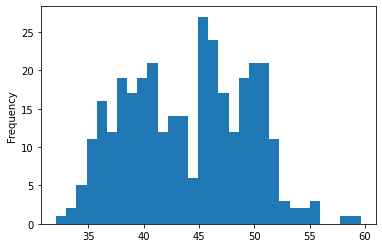

In [28]:
df['bill_length_mm'].plot(kind='hist', bins=30);

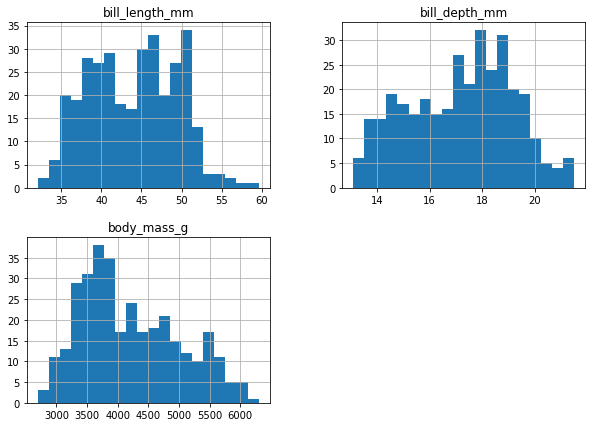

In [29]:
# we can apply this to multiple columns at once

df[['bill_length_mm', 'bill_depth_mm', 'body_mass_g']].hist(bins=20, figsize=(10,7));

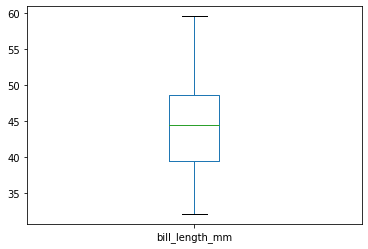

In [30]:
df['bill_length_mm'].plot(kind='box');

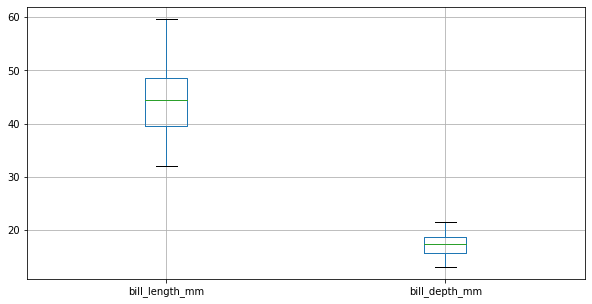

In [31]:
df[['bill_length_mm', 'bill_depth_mm']].boxplot(figsize=(10,5));

<AxesSubplot:>

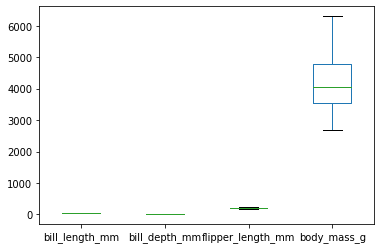

In [32]:
df.plot(kind='box')  #not useful!

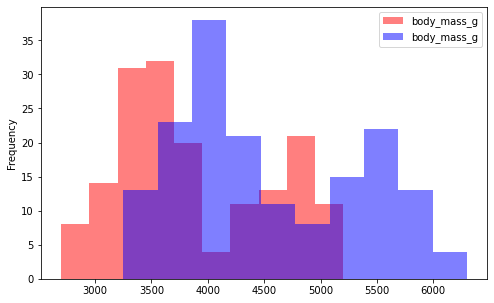

In [33]:
# selecting by conditions, plotting two in one, introducing alpha, histogram
df['body_mass_g'].loc[df['sex'] == 'female'].plot(alpha = 0.5, kind='hist', color='red', figsize=(8,5)) ; # legend will only display column-name
df['body_mass_g'].loc[df['sex'] == 'male'].plot(alpha = 0.5, kind='hist', color='blue') ;
plt.legend();

#### Other plots with pandas: 
check the documentation here: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

## 5. Plotting with Seaborn


In [34]:
#!pip install seaborn

In [36]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


### Q: Let's replot our answer to Q5 using seaborn

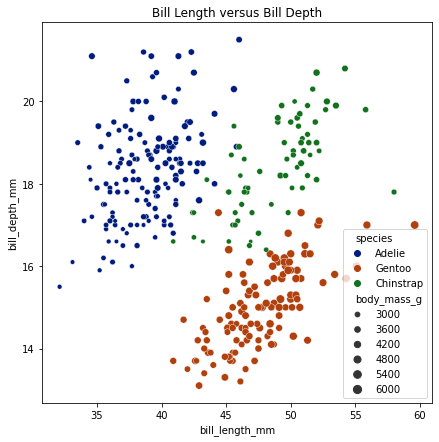

In [37]:
fig, ax = plt.subplots(figsize=(7,7))

ax = sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', palette='dark', size='body_mass_g')

plt.title("Bill Length versus Bill Depth")

plt.show()

### 5.1 Plotting numerical variables 

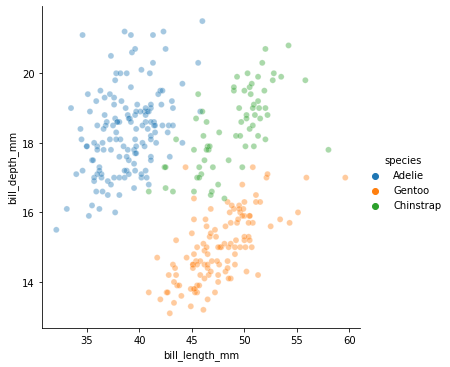

In [64]:
# another way to plot Q5 is to use relplot


sns.relplot(x="bill_length_mm", y="bill_depth_mm", hue="species", data=df, kind='scatter', alpha=0.4) ;

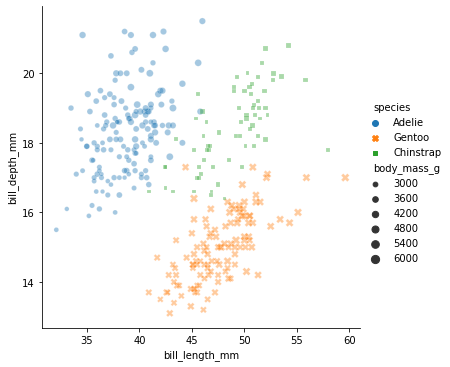

In [66]:
# How can we change marker style and size of marker based on a column ?
sns.relplot(x="bill_length_mm", y="bill_depth_mm", hue="species", 
            data=df, kind='scatter', alpha=0.4,
            style='species', size='body_mass_g') ;


# we can save the figure in the same way
#plt.savefig("seaborn_scatter.png")

### Q6: Expand on Q5 by plotting separate subplots for each habitat/island ? 

#### how can we produce subplots with seaborn ?

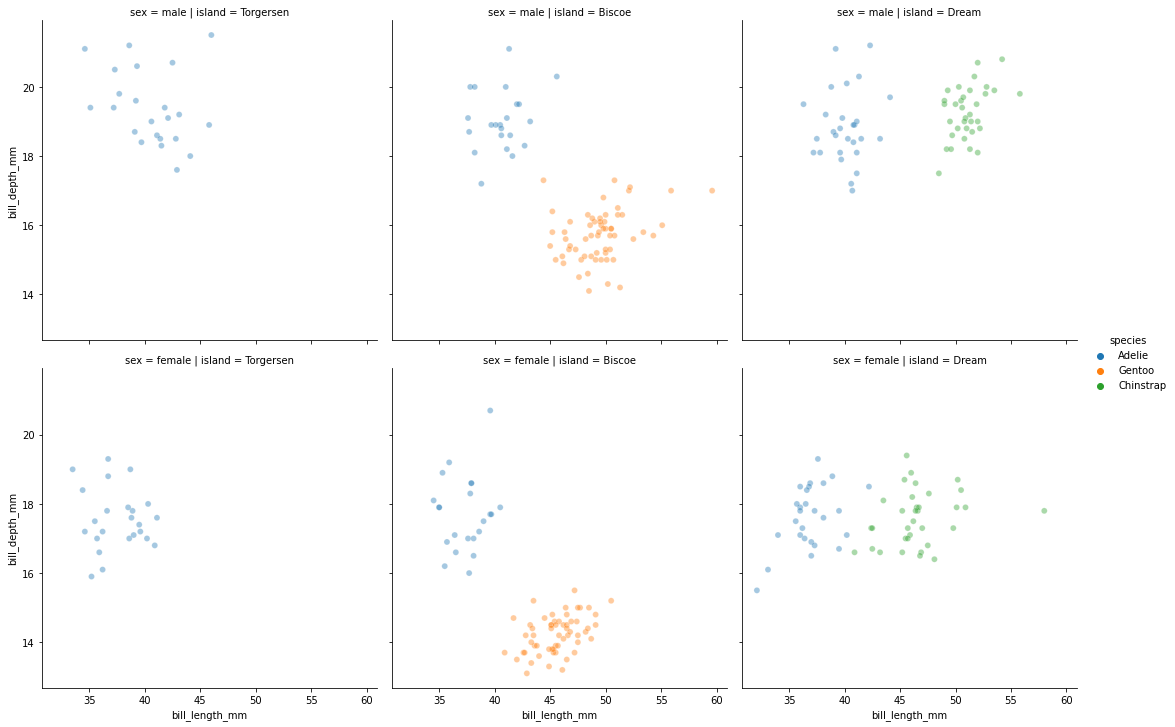

In [70]:
sns.relplot(x="bill_length_mm", y="bill_depth_mm", hue="species", col='island', row='sex', data=df, alpha=0.4) ;

#row='sex'

### 5.2 Plotting categorical variables

### use seaborn to answer Q4: Does Penguins living in different islands have different weights ?

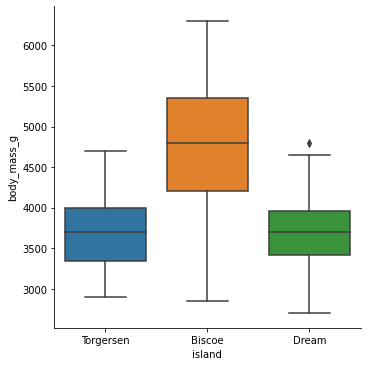

In [71]:
sns.catplot(data=df, x='island', y='body_mass_g', kind='box');


### Q6: same as Q4 but differentiate between male and females.

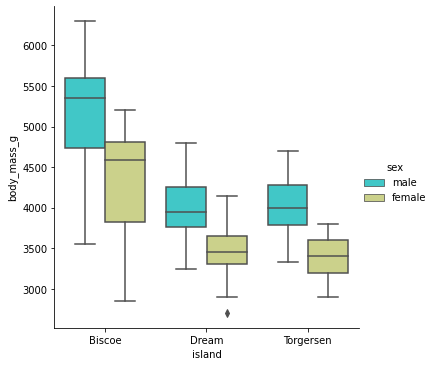

In [74]:
# option 1:

sns.catplot(data=df, x='island', y='body_mass_g', kind='box', 
            hue='sex', order=['Biscoe', 'Dream', 'Torgersen'], palette='rainbow');


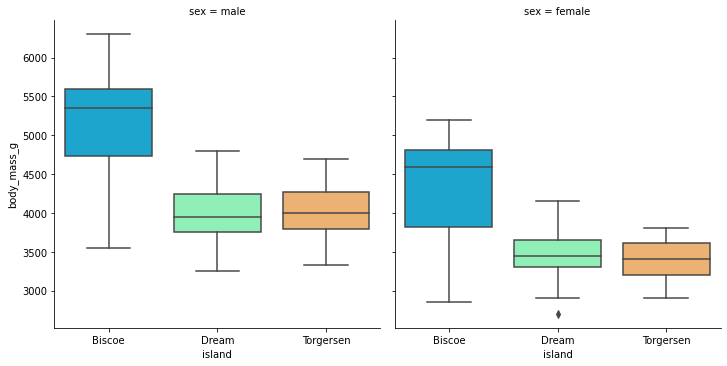

In [75]:
# option 2

sns.catplot(data=df, x='island', y='body_mass_g', kind='box', 
            col='sex', order=['Biscoe', 'Dream', 'Torgersen'], palette='rainbow');



### if we don't want to see the entire distribution, but the mean and the cofidence interval

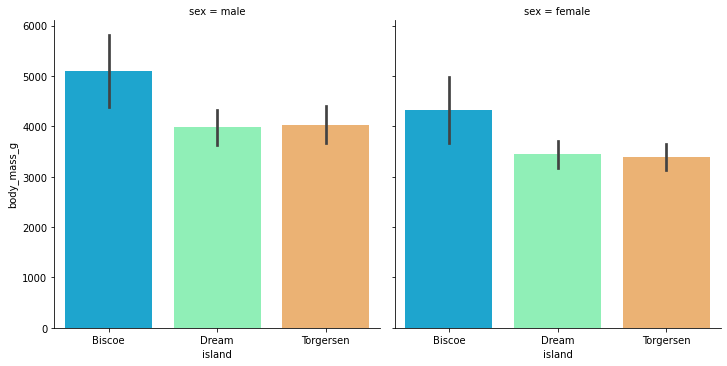

In [76]:
sns.catplot(data=df, x='island', y='body_mass_g', kind='bar', 
            col='sex', order=['Biscoe', 'Dream', 'Torgersen'], palette='rainbow', ci='sd');



### 5.3 Generating pairplots

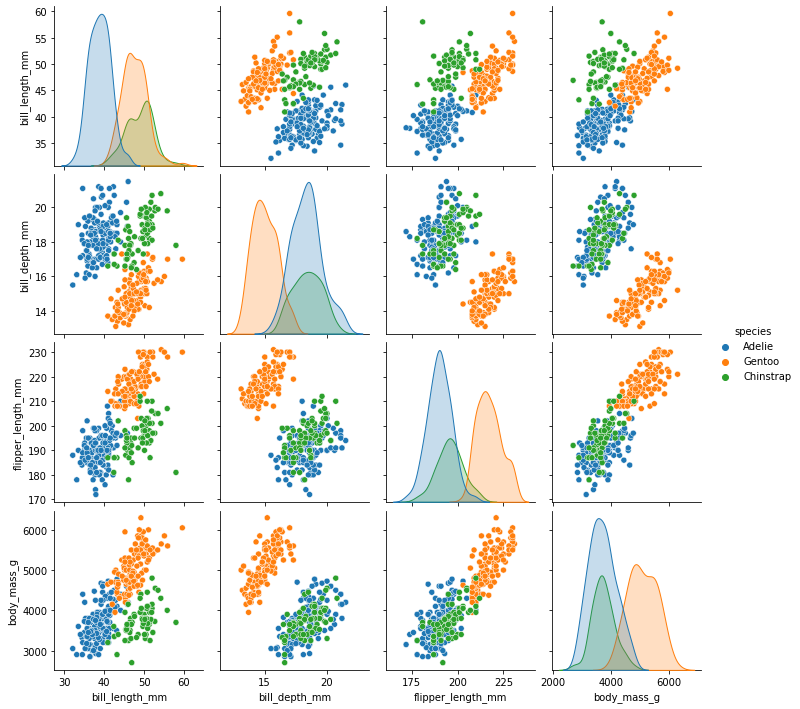

In [77]:
sns.pairplot(data=df, hue='species');

Plotting inspiration:
    https://python-graph-gallery.com/  
Advice on how to use colors: https://academy.datawrapper.de/article/140-what-to-consider-when-choosing-colors-for-data-visualization and https://projects.susielu.com/viz-palette